<a href="https://colab.research.google.com/github/pccalegari/exemplos-CN/blob/main/eqcalor1D_implicito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

erro norma maximo 0.15938636634155837


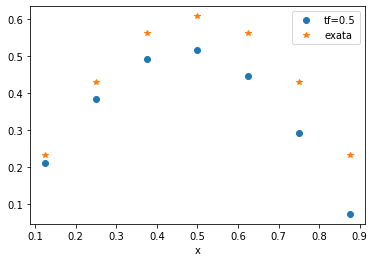

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def phi(x, t):
  return np.exp(-t)*np.sin(np.pi*x)

def f(x,t,alpha):
  return ((alpha*alpha*np.pi*np.pi - 1)*phi(x, t))

def main():
  N = 8
  b = 1
  a = 0
  h = (b - a)/N
  t0 = 0
  tf = 0.5
  alpha = 1
  dt = (h*h)/(2*alpha*alpha)

  x = np.linspace(a,b,N+1)
  
  phi0 = np.zeros(N-1)
  phiag = np.zeros(N+1)
  b = np.zeros(N-1)
  phie = np.zeros(N-1)
  A = np.zeros((N-1,N-1))

  for i in range(N-1):
    phi0[i] = phi(x[i+1], t0) 
    phie[i] = phi(x[i+1], tf)
  

  t = t0
  while (t < tf):
    s = dt*alpha*alpha/(h*h)
    A[0][0] = 1 + 2*s
    for i in range(1,N-1):
        A[i][i] = 1 + 2*s
        A[i-1][i] = -s
        A[i][i-1] = -s
    
    t += dt
    #Lado direito do sistema
    for i in range(N-2):
      b[i] = phi0[i] + dt*f(x[i+1], t, alpha)

    #Condição de contorno
    b[0] = b[0] + s*phi(x[0],t)
    b[N-2] = b[N-2] + s*phi(x[N],t)

    phia = np.linalg.solve(A, b)

    for i in range(N-1):
      phi0[i] = phia[i]
    dt = min(dt, tf - t)

  for i in range(N-1):
    phiag[i+1] = phia[i]
  phiag[0] = phi(x[0],t)
  phiag[N] = phi(x[N],t) 

  print("erro norma maximo", np.linalg.norm(phie - phia, ord=np.inf))  

  plt.figure(1)
  plt.plot(x[1:N], phia, 'o', label='tf=0.5')
  plt.plot(x[1:N], phie, '*', label='exata')
  plt.xlabel("x")
  plt.legend()
  plt.show()

main() 

In [ ]:
print(0.15938636634155837/0.07896636818093875)
print(0.07896636818093875/0.039507848680057446)
print(0.039507848680057446/0.01979054335885396)

2.0184082162212413
1.9987514081170143
1.996299341745071
